# Tri de Shell

*Shell, D. L. (1959). "A High-Speed Sorting Procedure". Communications of the ACM. 2 (7): 30–32*

## Principe

Le tri de Shell est une version modifiée du tri par insertion qui cherche à utiliser au mieux son efficacité pour trier

* de petit tableaux
* des tableaux presque triés 

L'opération de base s'appelle le $h$-tri. Il consiste à trier le tableau par insertion, mais en sautant de $h$ indices plutôt que de $1$ lors de la recherche de la position d'insertion.

On répète le $h$-tri pour des valeurs de h décroissantes, ce qui correspond à des sous-tableaux de plus en plus grands, mais de mieux en mieux presque triés. On finit par un $1$-tri qui est un tri par insertion classique.

Effectuer un $h$-tri sur un tableau est équivalent à trier par insertion chacun des $h$ sous tableaux reprenant les éléments d'indices 0, 1, ... $h-1$ modulo $h$, soit 

In [1]:
def afficher_parties(T,h):
    N = len(T)
    for i in range(h):
        print("{0}%{1} :".format(i,h),T[slice(i,N,h)])
   
T = [ 5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1 ]
afficher_parties(T,4)

0%4 : [5, 13, 2, 1]
1%4 : [3, 4, 7]
2%4 : [12, 10, 6]
3%4 : [8, 11, 9]


## Le $h$-tri

L'algorithme de $h$-tri est quasi identique à celui du tri par insertion. Mais plutôt que de reculer d'une position pour tenter l'insertion, on recule de $h$. Cela change 3 lignes de code (la version commentée est celle correspondante du tri par insertion) 

In [2]:
def h_tri(T,h):
    N = len(T)
    for j in range(1,N):
        tmp = T[j]
        i = j     
                                          # Rappel: tri par insertion
            
        while i > h-1 and tmp < T[i-h]:   # i > 0 and tmp < T[i-1]       
            T[i] = T[i-h]                 # T[i] = T[i-1]
            i -= h                        # i -= 1
            
        T[i] = tmp

Voyons son effet sur le tableau

In [3]:
T = [ 5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1 ]
h_tri(T,4)
print(T)

[1, 3, 6, 8, 2, 4, 10, 9, 5, 7, 12, 11, 13]


L'effet du $h$-tri est plus visible en affichant les $h$ parties modulo $h$. 

In [4]:
afficher_parties(T,4)

0%4 : [1, 2, 5, 13]
1%4 : [3, 4, 7]
2%4 : [6, 10, 12]
3%4 : [8, 9, 11]


## Boucle externe

La boucle externe consiste à appeler le $h$-tri pour des valeurs de $h$ décroissantes. On utilise ici une suite  proposée par Pratt (1971): $h(k) = \frac{3^k-1}{2}$. 

Cette suite est simple à générer en notant que 
* $h(0) = 1$
* $h(k) = 3 h(k-1)+1$ permet de trouver la valeur de départ
* $h(k-1) = \left \lfloor{\frac{h(k)}{3}}\right \rfloor $ permet de calculer les valeurs décroissantes. 

In [5]:
def boucle_externe(T):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:
        h_tri(T,h)
        h = h//3     # division entière

Testons le résultat

In [6]:
T = [ 5, 3, 12, 8, 13, 4, 10, 11, 2, 7, 6, 9, 1 ]
boucle_externe(T)
print(T)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Cela fonctionne, mais ... quelque soit le prétraitement effectué, on finit par un appel à `h_tri(T,1)`, qui est un tri par insertion classique. On était donc certain de bien trier le tableau. Une question plus intéressante est de voir l'effet du prétraitement sur la complexité. 

## En résumé

Le tri de Shell comporte trois boucles imbriquées.
* Les deux boucles internes mettent en oeuvre le $h$-tri
* La boucle externe fait varier $h$ selon une suite bien choisie. 

*Note: La fonction de comparaison est passée en paramètre générique pour permettre l'analyse de la stabilité, et les opérations de comparaison et d'assignation dans le tableau sont sous-traitées à include.helpers pour permettre de les compter lors de l'analyse de la complexité*

In [7]:
import include.helpers as asd1

def tri_de_shell(T, comparer = asd1.plus_petit):
    N = len(T)
    h = 1
    while h*3 < N:
        h = 3*h+1
        
    while h >= 1:        
        for j in range(1,N):
            tmp = T[j]
            i = j
            while i > h-1 and comparer(tmp,T[i-h]):
                T[i] = asd1.assigner(T[i-h])
                i -= h
            T[i] = asd1.assigner(tmp)
        
        h = h//3

# Complexité

Evaluons d'abord la complexité du tri d'un tableau au contenu généré aléatoirement. 

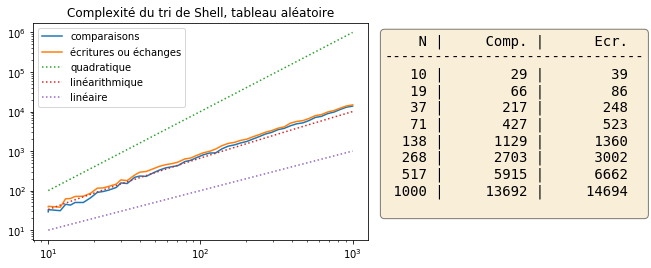

In [8]:
asd1.evalue_complexite(tri_de_shell, asd1.tableau_aleatoire, 
                       "tri de Shell, tableau aléatoire")

* le nombre de comparaisons et d'écritures est quasiment égal 
* leur complexité est proche mais légèrement plus grande que $\Theta(n.log(n))$. 
* le nombre exact de comparaisons varie, sans doute en fonction du contenu du tableau

Vérifions cette dernière hypothèse en triant un tableau déjà trié

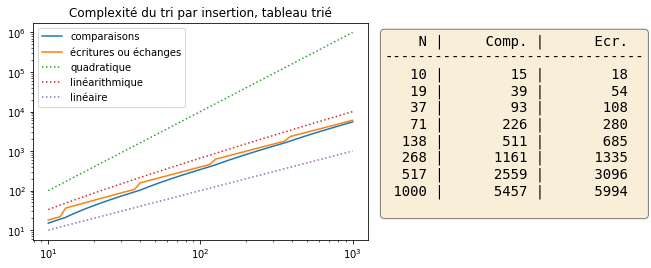

In [9]:
asd1.evalue_complexite(tri_de_shell, asd1.tableau_trie, 
                       "tri par insertion, tableau trié")

La complexité est linéarithimique. Chacun des $h$-tris effectue $h$ tris par insertion sur des tableaux de $\frac{n}{h}$ éléments triés, ce qui donne une complexité linéraire $\Theta(n)$. 

Par ailleurs, la suite des $h$ choisie implique que $log_3(n)$ $h$-tris sont effectués. 

On a donc une complexité totale de l'ordre de $\Theta(n.log_3(n))$ . 

Observons maintenant le cas inverse d'une entrée triée à l'envers

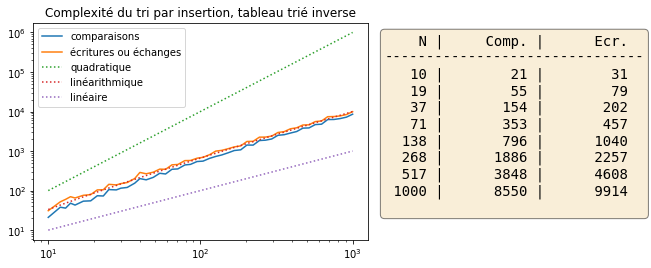

In [10]:
asd1.evalue_complexite(tri_de_shell, asd1.tableau_trie_inverse, 
                       "tri par insertion, tableau inverse")

Nous avons de nouveau une complexité linéarithmique. 

Notons que ce n'est pas le pire cas. Les $h$ parties sont ici bien équilibrées, ce qui est favorable. 

Déterminer le pire des cas est sensiblement plus complexe, mais il est possible de prouver que la complexité est alors de l'ordre de $\Theta(n^{1.5})$ pour la suite $h(k) = 3 \times h(k-1)+1$. 

On ne connait pas la suite $h(k)$ optimale, ni la complexité qu'elle permettrait d'atteindre. Il semble que les meilleures suites aient un facteur de progression proche de $2.2$ plutôt que de $3$. La meilleure suite actuellement connue est 1, 4, 10, 23, 57, 132, 301, 701, 1750. (*Marcin Ciura, 2001*)

En pratique, le tri de Shell est cependant assez proche de l'efficacité des meilleurs tris (rapide et fusion) tout en étant relativement plus simple à mettre en oeuvre. 

Certaines implantations de qsort (C) visant les systèmes embarqués le mettent en oeuvre avec un tri de Shell plutôt qu'un tri rapide. Il est par exemple utilisé par [uClibc](https://fr.wikipedia.org/wiki/UClibc). 

## Stabilité

Le tri de Shell n'est **pas stable**. 

Le $h$-tri avec $h>1$ fait bouger les éléments sans tenir compte des $h-1$ éléments entre deux éléments d'indice égaux modulo $h$. Il est donc possible qu'il modifie l'ordre d'éléments égaux.  

Vérifions le en triant par parties fractionnaires puis par parties entières. 


Le tri n'est pas stable


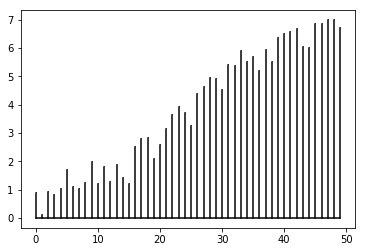

In [11]:
asd1.test_stabilite(tri_de_shell)

# Visualisation

Finalement, visualisons graphiquement le tri de Shell. Trions un tableau de 50 entiers aléatoires entre 0 et 100 et regardons son état après chaque h_tri. 

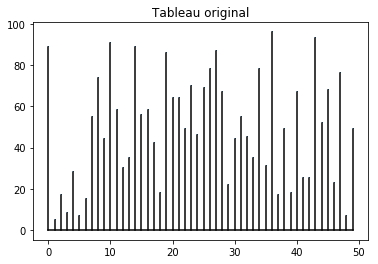

In [12]:
import numpy as np
T = np.random.randint(0,100,50)
asd1.afficheIteration(T,'Tableau original')     

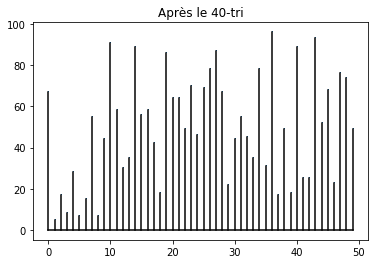

In [13]:
h_tri(T,40)
asd1.afficheIteration(T,'Après le 40-tri')

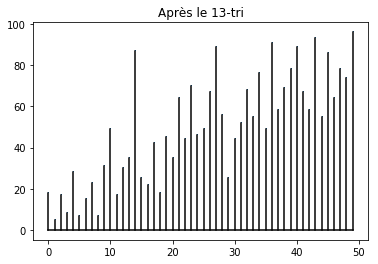

In [14]:
h_tri(T,13)
asd1.afficheIteration(T,'Après le 13-tri')

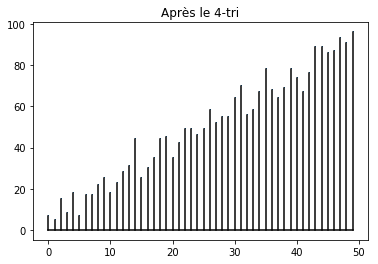

In [15]:
h_tri(T,4)
asd1.afficheIteration(T,'Après le 4-tri')

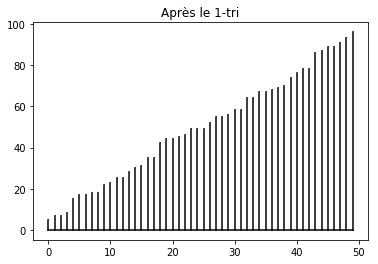

In [16]:
h_tri(T,1)
asd1.afficheIteration(T,'Après le 1-tri')

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018